# Métodos de optimizción basados en gradiente

El gradiente descendiente es el método estándar para realizar optimización de los pesos en una red neuronal. Pero existen diferentes formas de implementar esta optimización, como por ejemplo: Sotchastic Gradient Descent (SGD), Batch Gradient Descent o Mini-batch Gradient Descent. 

Una parte importante del método de gradiente descendiente es la elección de rango de aprendizaje. Existen métodos que buscan estimar un rango de aprendizaje que pueda permitir una convergencia de los pesos de la red adecuada. Aquí exploramos dos de estos métodos: 1) Adagrad y 2) Adam. Además comparamos con un grdiente descendiente stocástico.

In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Datos de entrenamiento

Elegimos una tarea de clasificiación binaria simple y preparamos el conjunto de datos supervisados que utilizaremos para los distintos métodos:

In [2]:
#Abrir los datos
data = pd.read_csv('cat_data.csv')
data

,¿es animal?,¿es mamífero?,¿es felino?,¿es doméstico?,¿tiene dos orejas?,¿es negro?,¿tiene cuatro patas?,¿es gato?
0,1,1,1,1,1,1,1,1
1,0,0,0,1,0,1,0,0
2,1,0,1,1,0,1,1,0
3,1,1,0,1,1,0,1,0
4,1,1,1,0,1,0,1,0
5,1,1,1,1,0,0,0,1
6,1,0,0,1,1,1,0,0
7,1,1,1,1,0,0,1,1
8,1,0,0,1,0,0,0,0
9,0,0,0,0,0,0,0,0


In [3]:
#Convertir los datos a numpy
npData = data.to_numpy()
#Ejemplos
X = npData[:,:-1]
#Clases de los ejemplos
Y = npData[:,-1]

#Tamaño de los datos
#Unidades de entrada
N,d = X.shape

print('Número de vectores de entrenamiento: {}, con dimensión: {}'.format(N,d))

Número de vectores de entrenamiento: 14, con dimensión: 7


Visualizamos los datos en dos dimensiones:

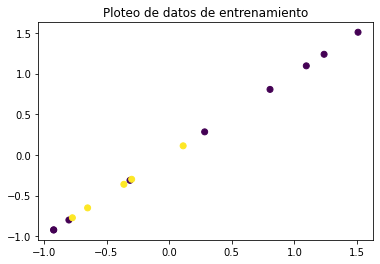

In [4]:
#Reducción de dimensionalidad
X_plot = PCA(2).fit_transform(X)
#Visualización
plt.scatter(X_plot[:,0],X_plot[:,0], c=Y)
plt.title('Ploteo de datos de entrenamiento')
plt.show()

Una vez preparados los datos de entrenamiento, procedemos a estimar los pesos de la red; para esto, utilizamos en primer lugrar SGD.

# Métodos basados en GD

Para explorar los diferentes métodos que se basan en el concepto del gradiente descendiente, entrenaremos una red neuronal a la que aplicaremos una capa oculta. En todos los casos, la arquitectura de la red es como sigue:

* Una capa oculta con tres unidades y activación $\tanh$.
* Una capa de salida con dos unidades (para cada clase) con activación Softmax.
* La función de riesgo estará determinada por la entropía cruzada: $$R(\theta) = \sum_x \sum_y y \ln \phi_y(x)$$ Donde $\phi_y(x)$ es la salida de la red en la clase dada ($y=0$ ó $y=1$).

## Stochastic Gradient Descent

En el Stochastic Gradient Descent o SGD se tiene que:

* Se actualizan los pesos cada vez que se observa un ejemplo. 
* El rango de aprendizaje es un hiperparámetro fijo, esto es, no varía durante el entrenamiento.

La actualización de los pesos se hace como:

$$\theta \leftarrow \theta - \eta \nabla_{\theta} R(\theta;x,y)$$

En este caso, el gradiente $\nabla_{\theta} R(\theta;x,y)$ está evaluado sobre sólo un par de entrenamiento $(x,y)$.

In [5]:
%%time
np.random.seed(0)

#HIPERPARÁMETROS
its = 1000
eta = 1

#Inicializar pesos
h_dim = 3
W1 = np.random.rand(h_dim,d)/np.sqrt(d)
b1 = np.ones(h_dim)
W2 = np.random.rand(2,h_dim)/np.sqrt(h_dim)
b2 = np.ones(2)

t = 0
stop = False
while stop == False:
    error = 0
    for x,y in zip(X,Y):
        #FORWARD
        #Capa oculta
        a1 = np.dot(W1,x)+b1
        h = np.tanh(a1)
        #Capa de salida
        a2 = np.dot(W2,h)+b2
        exp = np.exp(a2)
        f = exp/exp.sum(0)
        
        #BACKWARD
        #Backpropagation capa de salida
        d_out = exp/exp.sum(0)
        d_out[y] -= 1
        #Backpropagation capa oculta
        d_h = (1-h**2)*np.dot(W2.T,d_out)        

        #Derivadas
        DW2 = np.outer(d_out,h)
        Db2 = d_out
        DW1 = np.outer(d_h,x)
        Db1 = d_h
        
        #Actualización de pesos
        #El rango de aprendizaje es fijo
        W2 -= eta*DW2
        b2 -= eta*Db2
        W1 -= eta*DW1
        b1 -= eta*Db1
        
        #Error cuadrático
        error += (np.argmax(f)-y)**2
        
    t += 1
    #Imprime el error cada 25 its.
    if t % 25 == 0:
        print('Error en iteración {}: {}'.format(t,error))
    #Condición de finalización
    if error == 0 or t == its:
        stop = True
    

Error en iteración 25: 5
Error en iteración 50: 6
Error en iteración 75: 4
Error en iteración 100: 4
Error en iteración 125: 6
Error en iteración 150: 2
Error en iteración 175: 2
Error en iteración 200: 2
Error en iteración 225: 2
Error en iteración 250: 2
Error en iteración 275: 2
Error en iteración 300: 2
Error en iteración 325: 2
Error en iteración 350: 2
Error en iteración 375: 2
Error en iteración 400: 2
Error en iteración 425: 2
Error en iteración 450: 2
Error en iteración 475: 2
Error en iteración 500: 2
Error en iteración 525: 2
Error en iteración 550: 2
Error en iteración 575: 2
Error en iteración 600: 2
Error en iteración 625: 2
Error en iteración 650: 2
Error en iteración 675: 2
Error en iteración 700: 2
Error en iteración 725: 2
Error en iteración 750: 2
Error en iteración 775: 2
Error en iteración 800: 2
Error en iteración 825: 2
Error en iteración 850: 2
Error en iteración 875: 2
Error en iteración 900: 2
Error en iteración 925: 2
Error en iteración 950: 2
Error en iterac

Podemos definir una función forward para observar el resultado de la red con los pesos aprendidos.

In [6]:
def forward(X):
    a1 = np.dot(X,W1.T)+b1
    h = np.tanh(a1)
    a2 = np.dot(h,W2.T)+b2
    exp = np.exp(a2)
    f = exp/exp.sum(1, keepdims=True)
    
    return f

print(np.argmax(forward(X), axis=1),Y)

[0 0 0 0 0 1 0 1 0 0 0 0 1 1] [1 0 0 0 0 1 0 1 0 0 0 0 1 1]


## ADAGRAD

El método de Adagrad se basa en el SGD, pero aquí el rango de aprendizaje varía, y las actualizaciones se realizan según la regla:

$$\theta_i \leftarrow \theta_i - \frac{\eta}{\sqrt{\mu}+\epsilon} \nabla_{\theta_i} R(\theta)$$

Donde $\mu$ es un parámetro que varía según la siguiente regla:

$$\mu \leftarrow \mu + [\nabla_{\theta_i} R(\theta)]^2$$

In [7]:
%%time
np.random.seed(0)

##HIPERPARÁMETROS
its = 1000
#Rango de aprendizahe inicial
eta = 1
#Epsilon
eps = 1e-8

#Inicializar pesos
h_dim = 3
W1 = np.random.rand(h_dim,d)/np.sqrt(d)
b1 = np.ones(h_dim)
W2 = np.random.rand(2,h_dim)/np.sqrt(h_dim)
b2 = np.ones(2)

#Inicialización del parámetro mu
#Se utiliza uno para cada matriz de pesos
mu1 = 0
mub1 = 0
mu2 = 0
mub2 = 0

t = 0
stop = False
while stop == False:
    error = 0
    for x,y in zip(X,Y):
        #FORWARD
        #Capa oculta
        a1 = np.dot(W1,x)+b1
        h = np.tanh(a1)
        #Capa de salida
        a2 = np.dot(W2,h)+b2
        exp = np.exp(a2)
        f = exp/exp.sum(0)
        
        #BACKWARD
        #Backpropagation capa de salida
        d_out = exp/exp.sum(0)
        d_out[y] -= 1
        #Backpropagation capa oculta
        d_h = (1-h**2)*np.dot(W2.T,d_out)        

        #Derivadas
        DW2 = np.outer(d_out,h)
        Db2 = d_out
        DW1 = np.outer(d_h,x)
        Db1 = d_h
        
        #ADAGRAD
        #Actualizació de mu
        mu1 += DW1**2
        mub1 += Db1**2
        mu2 += DW2**2
        mub2 += Db2**2
        
        #Cada matriz de pesos se actualiza por Adagrad
        W2 -= (eta/(np.sqrt(mu2)+eps))*DW2
        b2 -= (eta/(np.sqrt(mub2)+eps))*Db2
        W1 -= (eta/(np.sqrt(mu1)+eps))*DW1
        b1 -= (eta/(np.sqrt(mub1)+eps))*Db1
        
        #Error cuadrático
        error += (np.argmax(f)-y)**2
        
    t += 1
    print('Error en iteración {}: {}'.format(t,error))
    #Condición de paro
    if error == 0 or t == its:
        stop = True

Error en iteración 1: 7
Error en iteración 2: 6
Error en iteración 3: 6
Error en iteración 4: 6
Error en iteración 5: 6
Error en iteración 6: 6
Error en iteración 7: 6
Error en iteración 8: 6
Error en iteración 9: 6
Error en iteración 10: 5
Error en iteración 11: 5
Error en iteración 12: 5
Error en iteración 13: 5
Error en iteración 14: 4
Error en iteración 15: 5
Error en iteración 16: 5
Error en iteración 17: 5
Error en iteración 18: 3
Error en iteración 19: 2
Error en iteración 20: 2
Error en iteración 21: 2
Error en iteración 22: 3
Error en iteración 23: 3
Error en iteración 24: 3
Error en iteración 25: 3
Error en iteración 26: 2
Error en iteración 27: 2
Error en iteración 28: 2
Error en iteración 29: 0
CPU times: user 168 ms, sys: 29.1 ms, total: 197 ms
Wall time: 158 ms


## ADAM

Es un método basado en SGD, pero donde el rango de aprendizaje y los valores de cambio varían, siendo que la actualización de los pesos de la red se actualizan por medio de la regla:

$$\theta_i \leftarrow \theta_i - \frac{\eta}{\sqrt{\hat{\nu}} + \epsilon} \hat{m}$$

Donde:

$$\hat{m} = \frac{m}{1-\beta_1}$$

y:

$$\hat{\nu} = \frac{\nu}{1-\beta_2}$$

Tal que $m$ es un parámetro que se actualiza como:

$$m \leftarrow \beta_1 m + (1-\beta_1) \nabla_\theta R(\theta)$$

Mientras que $\nu$ es actualizado como:

$$\nu \leftarrow \beta_2 \nu + (1-\beta_2) [\nabla_\theta R(\theta)]^2$$

Aquí, $\beta_1, \beta_2\in [0,1]$ son dos hiperparámetros.

In [8]:
%%time
np.random.seed(0)

##HIPERPARÁMETROS
#Núm de iteraciones
its = 1000
#Para ADAM
#Rango de aprendizaje inicial
eta = 1
#Epsilón
eps = 1e-8
#hiperparámetros beta1 y beta2
beta1 = 0.0009
beta2 = 0.0009

#Inicializar pesos
h_dim = 3
W1 = np.random.rand(h_dim,d)/np.sqrt(d)
b1 = np.ones(h_dim)
W2 = np.random.rand(2,h_dim)/np.sqrt(h_dim)
b2 = np.ones(2)

#Inicialización de m y nu
#Se tiene uno por cada matriz de pesos
m1 = 0
mb1 = 0
m2 = 0
mb2 = 0
v1 = 0
vb1 = 0
v2 = 0
vb2 = 0

t = 0
stop = False
while stop == False:
    error = 0
    for x,y in zip(X,Y):
        #FORWARD
        #Capa oculta
        a1 = np.dot(W1,x)+b1
        h = np.tanh(a1)
        #Capa de salida
        a2 = np.dot(W2,h)+b2
        exp = np.exp(a2)
        f = exp/exp.sum(0)
        
        #BACKWARD
        #Backpropagation capa de salida
        d_out = exp/exp.sum(0)
        d_out[y] -= 1
        #Backpropagation capa oculta
        d_h = (1-h**2)*np.dot(W2.T,d_out)        

        #Derivadas
        DW2 = np.outer(d_out,h)
        Db2 = d_out
        DW1 = np.outer(d_h,x)
        Db1 = d_h
        
        #ADAM
        #Actualización Primer momento
        m1 = beta1*m1 + (1-beta1)*DW1
        mb1 = beta1*mb1 + (1-beta1)*Db1
        m2 = beta1*m2 + (1-beta1)*DW2
        mb2 = beta1*mb2 + (1-beta1)*Db2
        #Actualización Segundo momento
        v1 = beta2*v1 + (1-beta2)*DW1**2
        vb1 = beta2*vb1 + (1-beta2)*Db1**2
        v2 = beta2*v2 + (1-beta2)*DW2**2
        vb2 = beta2*vb2 + (1-beta2)*Db2**2
        
        #Ponderación m
        m1_p = m1/(1-beta1)
        mb1_p = mb1/(1-beta1)
        m2_p = m2/(1-beta1)
        mb2_p = mb2/(1-beta1)
        #Ponderación nu
        v1_p = v1/(1-beta2)
        vb1_p = vb1/(1-beta2)
        v2_p = v2/(1-beta2)
        vb2_p = vb2/(1-beta2)
        
        #Actualización de pesos con ADAM
        W2 -= (eta/(np.sqrt(v2_p)+eps))*m2_p
        b2 -= (eta/(np.sqrt(vb2_p)+eps))*mb2_p
        W1 -= (eta/(np.sqrt(v1_p)+eps))*m1_p
        b1 -= (eta/(np.sqrt(vb1_p)+eps))*mb1_p
        
        #Error cuadrático
        error += (np.argmax(f)-y)**2
        
    t += 1
    print('Error en iteración {}: {}'.format(t,error))
    #Condición de paro
    if error == 0 or t == its:
        stop = True

Error en iteración 1: 7
Error en iteración 2: 7
Error en iteración 3: 6
Error en iteración 4: 6
Error en iteración 5: 5
Error en iteración 6: 4
Error en iteración 7: 5
Error en iteración 8: 4
Error en iteración 9: 3
Error en iteración 10: 3
Error en iteración 11: 3
Error en iteración 12: 3
Error en iteración 13: 3
Error en iteración 14: 0
CPU times: user 150 ms, sys: 19.3 ms, total: 169 ms
Wall time: 138 ms


Como puede observarse, el algoritmo de aprendizaje no converge correctamente en el método de SGD, pues debemos ajustar adecuadamente el rango de aprendizaje, lo que puede ser un proceso costoso.

En los otros métodos, Adagrad y Adam, la convergencia se da adecuadamente, el rango de aprendizaje se adapta al problema en ambos casos. A pesar de esto, la convergencia se da de diferente manera; en general, para este problema específico, el método de Adam parece una mejor opción.